<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Training for sin(x)

In [75]:
def perform_approximation(x, y_expected):

  # set up the neural network that will approximate the function

  # Every x in the polynomial (x, x^2, x^3) is its own function
  # unsqueeze maps from (2000) to (2000, 1)
  # pow uses all x parameters as powers for the tensor p
  p = torch.tensor([1, 2, 3], device=device)
  xx = x.unsqueeze(-1).pow(p)

  # a simple linear sequential model
  # input - 3, output - 1
  # Flatten maps the output to a 1D vector
  model = torch.nn.Sequential(
      torch.nn.Linear(3, 1),
      torch.nn.Flatten(0, 1)
  ).cuda()

  # mean square error with error summation
  loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

  learning_rate = 1e-6

  number_of_iterations = 100001

  #SGD optimizer
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  #set up loss statistics
  t_samples = []
  loss_samples = []
  loss_gradient_samples = []
  previous_loss = 0
  current_loss = 0
  loss_delta = 0
  max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
  stagnation_counter = 0
  total_stagnation = 0
  accepted_number_of_stagnation = 500



  # the training loop
  print("Entering training:")
  for t in range(number_of_iterations):
      # forward propagation
      # y = a + b x + c x^2 + d x^3
      y_pred = model(xx)

      # calculate the error using a built-in error function
      loss = loss_fn(y_pred, y_expected)

      # determine the rate at which the losses are changing
      current_loss = loss.item()
      loss_delta = previous_loss - current_loss
      previous_loss = current_loss
      if t % 1000 == 0:
          t_samples.append(t)
          loss_samples.append(current_loss)
          loss_gradient_samples.append(loss_delta)
          print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

      # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
      if abs(loss_delta) < max_stagnant_loss_rate:
        stagnation_counter += 1
      else:
        total_stagnation += stagnation_counter
        stagnation_counter = 0

      if stagnation_counter > accepted_number_of_stagnation:
        print(f"Training has reached the local minimum")
        break

      # reset the gradient using the optimizer
      optimizer.zero_grad()

      # backpropagation
      # calculates the gradient with respect to all three parameters of the model
      # all parameters within the model are tensors with the property requires_grad=True
      loss.backward()

      # update the parameters using the optimizer
      optimizer.step()

      # get the parameters
      linear_layer = model[0]

      a = linear_layer.bias.item()
      b = linear_layer.weight[:, 0].item()
      c = linear_layer.weight[:, 1].item()
      d = linear_layer.weight[:, 2].item()

      # display the learning process
      if t % 1000 == 0:
          y_graph = a + b * x + c * x ** 2 + d * x ** 3
          plt.plot(x.cpu().detach(), y_expected.cpu().detach(), '-r', label='expected function', color = "red") 
          plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='trained function', color ="blue")
          plt.title('Graph of y = a + bx + cx^2 + dx^3')
          plt.xlabel('x', color='#1C2833')
          plt.ylabel('y', color='#1C2833')
          plt.legend(loc='upper left')
          plt.grid()
          plt.show()

  print(f"Training finished after {t} iterations")
  print(f"Current loss:{current_loss}")
  print(f"Total stagnation:{total_stagnation}")
  print("Parameters: ")
  print(f"Learning rate: {learning_rate},  ")

  print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

  # a graph of the losses
  plt.plot(t_samples, loss_samples, '-r', label='losses')
  plt.title('Losses')
  plt.xlabel('Number of iterations', color='#1C2833')
  plt.ylabel('Loss', color='#1C2833')
  plt.legend(loc='upper left')
  plt.grid()
  print("Losses:")
  plt.show()

  # a graph of the losses
  plt.plot(t_samples, loss_gradient_samples, '-r', label='loss gradients', color="#232C33")
  plt.title('Losses')
  plt.xlabel('Number of iterations', color='#1C2833')
  plt.ylabel('Loss', color='#1C2833')
  plt.legend(loc='upper left')
  plt.grid()
  print("Loss gradients:")
  plt.show()

Entering training:
Iteration: 0, loss:  61755.2578125, loss_delta: -61755.2578125


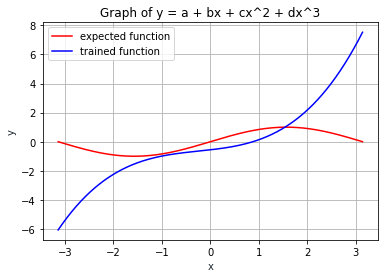

Iteration: 1000, loss:  22.02206039428711, loss_delta: 0.048675537109375


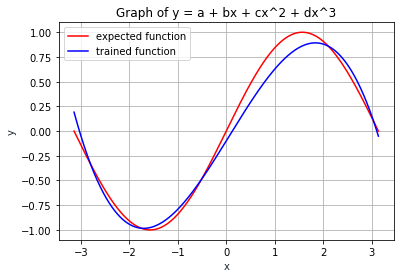

Iteration: 2000, loss:  9.1661958694458, loss_delta: 0.001255035400390625


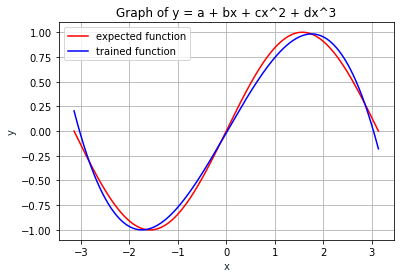

Iteration: 3000, loss:  8.827091217041016, loss_delta: 3.4332275390625e-05


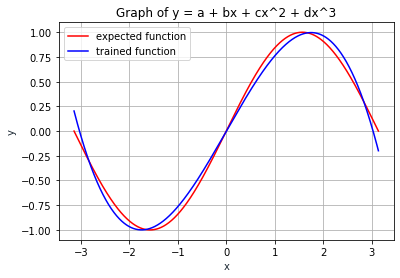

Training has reached the local minimum
Training finished after 3895 iterations
Current loss:8.817594528198242
Total stagnation:38
Parameters: 
Learning rate: 1e-06,  
Result: y = -0.0006701955571770668 + 0.8565802574157715 x + 0.00011561970313778147 x^2 + -0.09330753982067108 x^3
Losses:


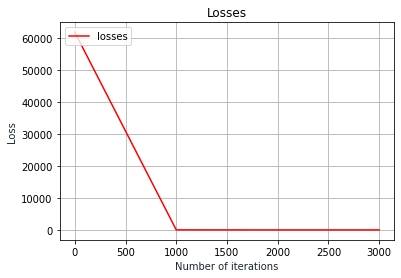

Loss gradients:


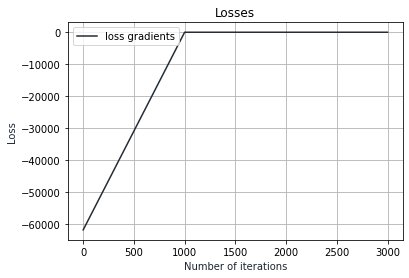

In [76]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y_expected = torch.sin(x)
perform_approximation(x, y_expected)

Entering training:
Iteration: 0, loss:  103629.1171875, loss_delta: -103629.1171875


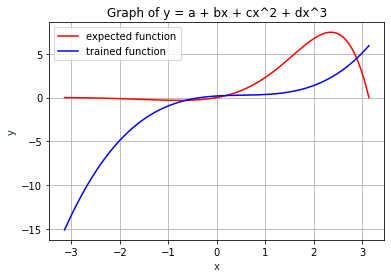

Iteration: 1000, loss:  2868.763671875, loss_delta: 0.257080078125


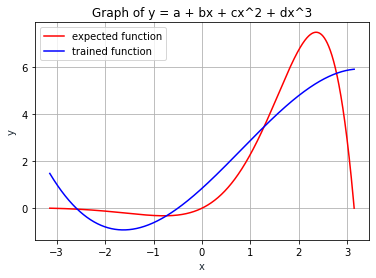

Iteration: 2000, loss:  2806.173095703125, loss_delta: 0.004638671875


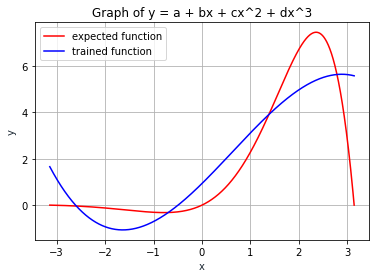

Iteration: 3000, loss:  2805.0087890625, loss_delta: 0.000244140625


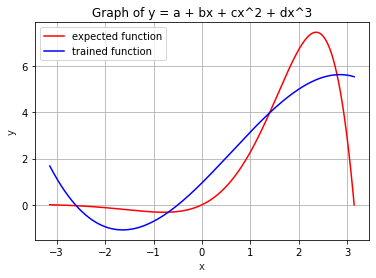

Iteration: 4000, loss:  2804.985107421875, loss_delta: 0.0


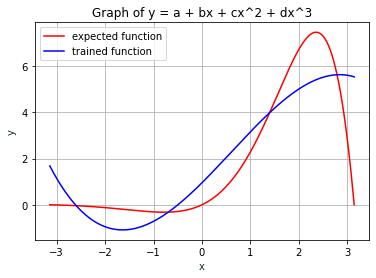

Iteration: 5000, loss:  2804.984375, loss_delta: 0.000244140625


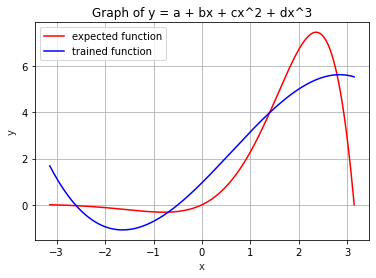

Iteration: 6000, loss:  2804.984619140625, loss_delta: 0.0


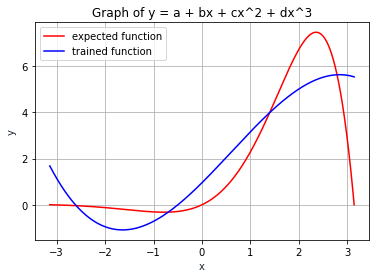

Training has reached the local minimum
Training finished after 6498 iterations
Current loss:2804.984619140625
Total stagnation:1769
Parameters: 
Learning rate: 1e-06,  
Result: y = 0.9516794681549072 + 2.0860400199890137 x + 0.26886942982673645 x^2 + -0.1492634117603302 x^3
Losses:


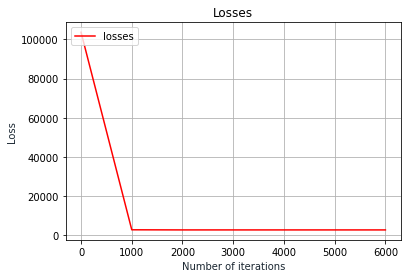

Loss gradients:


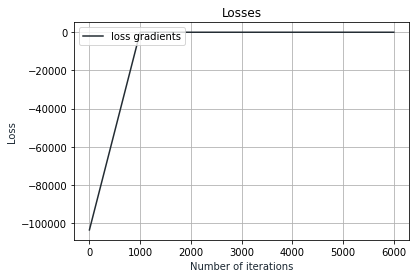

In [77]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y_expected = torch.sin(x)*torch.exp(x)
perform_approximation(x, y_expected)